In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\darre\OneDrive\Desktop\AB_NYC_2019.csv", index_col = 0)
df.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [16]:
#To check measures of central tendencies mean, median, and mode, check min and max values and quantiles of each feature.
df.describe()

,Host Id,Latitude,Longitude,Price,Room Type,Number of Reviews,Reviews Per Month,Number of Listings by Host,Availability
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
#Lets analyze how each column relates to one another by first renaming the collumns.
df = df.rename (
    columns={
        'name':'Title',
        'host_id':'Host Id',
        'host_name':'Host Name',
        'neighbourhood_group':'Neighborhood Group',
        'neighbourhood':'Neighborhood',
        'latitude':'Latitude',
        'longitude': 'Longitude',
        'room_type': 'Room Type',
        'price': 'Price',
        'minimum_nights': 'Room Type',
        'number_of_reviews': 'Number of Reviews',
        'last_review': 'Last Reviewed',
        'reviews_per_month': 'Reviews Per Month',
        'calculated_host_listings_count': 'Number of Listings by Host',
        'availability_365': 'Availability',})

In [5]:
#As we can see from the data below there are quite a few null entries in the 'Last Reviewed' and 'Reviews per Month' columns.
#Along with those columns there are some null entries in Title, and Host Name.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
Title                         48879 non-null object
Host Id                       48895 non-null int64
Host Name                     48874 non-null object
Neighborhood Group            48895 non-null object
neighbourhood                 48895 non-null object
Latitude                      48895 non-null float64
Longitude                     48895 non-null float64
Room Type                     48895 non-null object
Price                         48895 non-null int64
Room Type                     48895 non-null int64
Number of Reviews             48895 non-null int64
Last Reviewed                 38843 non-null object
Reviews Per Month             38843 non-null float64
Number of Listings by Host    48895 non-null int64
Availability                  48895 non-null int64
dtypes: float64(3), int64(6), object(6)
memory usage: 6.0+ MB


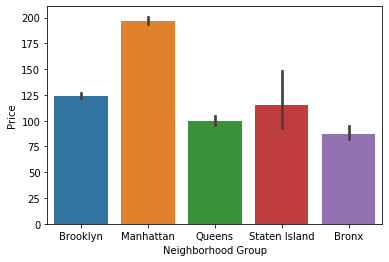

In [6]:
#Lets take a look at the price fluctuation from neighborhood group to neighborhood group.
df['Neighborhood Group'].unique()
import seaborn as sns
sns.barplot('Neighborhood Group', 'Price', data = df)

In [10]:
df.groupby('Neighborhood Group')['Price'].mean()

Neighborhood Group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: Price, dtype: float64

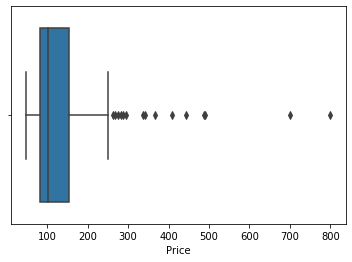

In [44]:
#Due to the pricing of specific accomodations being extremely large using the average based on its enighborhood reduces the size
#This also allows us to see the outlying prices.
x = df.groupby('Neighborhood')['Price'].mean()
sns.boxplot(x)

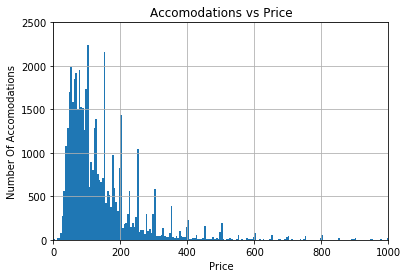

In [42]:
#Following Graph shows the most common pricing of accomodations as well as some of the outliers.
df['Price'].hist(bins=2000)
plt.xlim(0,1000)
plt.ylim(0,2500)
plt.xlabel("Price")
plt.ylabel("Number Of Accomodations")
plt.title("Accomodations vs Price")
plt.show()

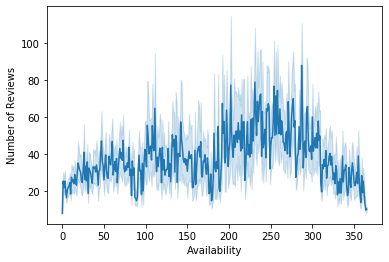

In [45]:
#With this line plot you can see the correlation of availability and revies (popularity).
#The more available an accomodation is the more reviews it will have.
x = df['Availability']
y = df['Number of Reviews']
sns.lineplot(x,y)